# Explore Vector Data (.zip & .shp) with GeoPandas

Load data and then perform some basic calculations.

The following data sets will be used: 

 * Data Set 1: United States Polys - http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_20m.zip More information can be found [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_description.html)
 * Data Set 2: Hiking Trails Data - http://honolulu-cchnl.opendata.arcgis.com/datasets/f78c7f66f5c54872840044cf4310cd2d_0.zip More information can be found [here](http://honolulu-cchnl.opendata.arcgis.com/datasets/f78c7f66f5c54872840044cf4310cd2d_0)

## Data Set 1 - United States Polys
 

In [2]:
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point
from random import randint, uniform
import matplotlib.pyplot as plt

import urllib.request
import shutil
from pathlib import Path
from zipfile import ZipFile

import geopandas as gpd

In [3]:


#Name the URL
file_URL = "http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_20m.zip"

#name the path
local_file_name = "States.zip"

file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/States.zip', 'r')
unzipped = os.getcwd() + '/States_unzipped'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file

# Read data into GeoDataFrame and view data
States = gpd.GeoDataFrame.from_file(shape_file)
States.head()



,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US23,79885221885,11748755195,23,00,Maine,23,01779787,ME,"(POLYGON ((-68.92401 43.885407, -68.8747839999..."
1,0400000US15,16634100855,11777698394,15,00,Hawaii,15,01779782,HI,"(POLYGON ((-156.049651 19.780452, -156.006267 ..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.617919 36.499414, -94.3612029999..."
4,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"POLYGON ((-75.773786 39.7222, -75.753227999999..."


In [4]:

States = gpd.GeoDataFrame.from_file(shape_file)
States.head()


,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US23,79885221885,11748755195,23,00,Maine,23,01779787,ME,"(POLYGON ((-68.92401 43.885407, -68.8747839999..."
1,0400000US15,16634100855,11777698394,15,00,Hawaii,15,01779782,HI,"(POLYGON ((-156.049651 19.780452, -156.006267 ..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.617919 36.499414, -94.3612029999..."
4,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"POLYGON ((-75.773786 39.7222, -75.753227999999..."


In [5]:


States.transpose()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
AFFGEOID,0400000US23,0400000US15,0400000US04,0400000US05,0400000US10,0400000US13,0400000US27,0400000US02,0400000US06,0400000US11,...,0400000US53,0400000US54,0400000US56,0400000US01,0400000US72,0400000US33,0400000US34,0400000US38,0400000US42,0400000US50
ALAND,79885221885,16634100855,294198560125,134771517596,5047194742,149169848456,206232257655,1477946266785,403501101370,158364992,...,172113416541,62265597146,251464935120,131173688951,8868100460,23187396994,19050755048,178711813026,115882226263,23873467535
AWATER,11748755195,11777698394,1027346486,2960191698,1398720828,4741100880,18929176411,245390495931,20466718403,18633403,...,12558451099,489902816,1861273298,4593686489,4923178155,1028678842,3541927612,4399093501,3396805575,1031124865
GEOID,23,15,04,05,10,13,27,02,06,11,...,53,54,56,01,72,33,34,38,42,50
LSAD,00,00,00,00,00,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
NAME,Maine,Hawaii,Arizona,Arkansas,Delaware,Georgia,Minnesota,Alaska,California,District of Columbia,...,Washington,West Virginia,Wyoming,Alabama,Puerto Rico,New Hampshire,New Jersey,North Dakota,Pennsylvania,Vermont
STATEFP,23,15,04,05,10,13,27,02,06,11,...,53,54,56,01,72,33,34,38,42,50
STATENS,01779787,01779782,01779777,00068085,01779781,01705317,00662849,01785533,01779778,01702382,...,01779804,01779805,01779807,01779775,01779808,01779794,01779795,01779797,01779798,01779802
STUSPS,ME,HI,AZ,AR,DE,GA,MN,AK,CA,DC,...,WA,WV,WY,AL,PR,NH,NJ,ND,PA,VT
geometry,"(POLYGON ((-68.92401 43.885407, -68.8747839999...","(POLYGON ((-156.049651 19.780452, -156.006267 ...","POLYGON ((-114.799683 32.593621, -114.809393 3...","POLYGON ((-94.617919 36.499414, -94.3612029999...","POLYGON ((-75.773786 39.7222, -75.753227999999...","POLYGON ((-85.605165 34.984678, -85.4743388431...","POLYGON ((-97.229039 49.000687, -96.93096 48.9...","(POLYGON ((179.481318 51.97530099999999, 179.5...","(POLYGON ((-118.593969 33.467198, -118.484785 ...","POLYGON ((-77.119759 38.934343, -77.0410179999...",...,"(POLYGON ((-123.237148 48.683466, -123.070427 ...","POLYGON ((-82.59886399999999 38.201007, -82.58...","POLYGON ((-111.056888 44.866658, -111.04431854...","POLYGON ((-88.46866248405129 31.8938557116156,...","(POLYGON ((-65.342068 18.34529, -65.255933 18....","POLYGON ((-72.556112 42.866252, -72.531469 42....","POLYGON ((-75.55944599999999 39.629812, -75.53...","POLYGON ((-104.048736 48.999877, -103.375467 4...","POLYGON ((-80.519891 40.906661, -80.5196437725...","POLYGON ((-73.416319 44.099422, -73.3998685693..."


## Data Set 2 - Hiking trails (Download, unzip and create GeoDataFrame)


In [6]:
## M3:E2:Cell04
# Add Your Code to Download the Hiking File
# -----------------------------------------
#Name the URL
file_URL = "http://honolulu-cchnl.opendata.arcgis.com/datasets/f78c7f66f5c54872840044cf4310cd2d_0.zip"

#name the path
local_file_name = "HiTrails.zip"

file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/HiTrails.zip', 'r')
unzipped = os.getcwd() + '/HiTrails_unzipped'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file




In [7]:


# Read data into GeoDataFrame and view data
HiTrails = gpd.GeoDataFrame.from_file(shape_file)
HiTrails.head()


,AMENITIE,CLIMAT,COMMENT,DISTRICT,ELEV_RANGE,END_PT,FEATURE,HAZARD,LENGTH_M,NAH,...,START_PT,ST_ACCESS,TRAIL_NUM,TSPT_TYPE,Trail_URL,Trailname,USE_REST,Web_Link,YRCREATED,geometry
0,None,Mild,"permit-DOFAW, Rd. starts at Manini Gulch",Waialua,500,"Past Peacock Flats, Mokuleia Trail","Hike, Nature Study, Hunt","Footing, Hunters",6.000000,Y,...,Kaena Pt. Tracking Station Rd.,2-wheel drive,OA 01 005,"4WD, Foot, Bicycle",http://hawaiitrails.ehawaii.gov/island.php?Tra...,Mokuleia-Kuaokala Firebreak Access Road,Permit,OA+01+005,Unknown,LINESTRING (-158.237758592625 21.5633764486087...
1,Camping,Mild,"Permit-DOFAW, Waialua Sugar, Dole, Army","Waialua, Wahiawa",800,Koolau Ridge,"Hike, Nature Study, Hunt","Hunters, Footing",3.221129,Y,...,End of Jeep Road,4-wheel drive,OA 08 007,Foot,http://hawaiitrails.ehawaii.gov/island.php?Tra...,Poamoho RidgeTrail,"Private access, time, permit",OA+08+007,1930's,LINESTRING (-157.953327658973 21.5307197484336...
2,Camping,Mild,"Permit-DOFAW, Waialua Sugar, Dole, Army","Waialua, Wahiawa",800,End of Jeep Road,"Hike, Nature Study, Hunt","Hunters, Footing",0.950487,Y,...,Poama Hele Loa Road,4-wheel drive,OA 08 007,"4WD, Bicycle",http://hawaiitrails.ehawaii.gov/island.php?Tra...,Poamoho Access Road,"Private access, time, permit",OA+08+007,1930's,LINESTRING (-157.965500330536 21.5309673174778...
3,Parking,"Mild, Wet","Makiki-Tantalus cplx, Maint by Operation",Honolulu,800,Manoa Falls,"Hike, Nature Study, Stream, Swim","Footing, floods",0.800000,Y,...,End of Manoa Road,Bus,OA 13 036,"Foot, Bicycle",http://hawaiitrails.ehawaii.gov/island.php?Tra...,Manoa Falls Trail,None,OA+19+007,Unknown,LINESTRING (-157.800745570437 21.3331170420384...
4,None,Mild,First part of trail old road,Honolulu,2000,Koolau summit Ridge,"Hike, Nature Study","Cliffs, footing",0.790949,Y,...,End Laukahi Street-gate blocks acc.,2-wheel drive,OA 15 008,Foot,http://hawaiitrails.ehawaii.gov/island.php?Tra...,Wiliwilinui Trail,Private Access. No open fires.,OA+15+008,Unknown,LINESTRING (-157.758745096246 21.3190537354933...


In [8]:


HiTrails.transpose()


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
AMENITIE,None,Camping,Camping,Parking,None,None,None,Parking,Parking,Parking,...,Parking,Parking,"Toilets, parking, potable water, picnic","Parking, toilets, potable water, picnic, camping",None,None,None,None,None,None
CLIMAT,Mild,Mild,Mild,"Mild, Wet",Mild,Mild,"Mild, Wet","Mild, Wet","Hot, Dry",Mild,...,"Mild, Wet","Hot, Dry","Hot, Dry",Mild,"Hot, Dry","Hot, Dry","Hot, Dry",Mild,Mild,Wet
COMMENT,"permit-DOFAW, Rd. starts at Manini Gulch","Permit-DOFAW, Waialua Sugar, Dole, Army","Permit-DOFAW, Waialua Sugar, Dole, Army","Makiki-Tantalus cplx, Maint by Operation",First part of trail old road,First part of trail old road,Permit - Army Support Command,Easement-explain purpose at guard gate,"Windy, access to Peacock Flat via Kealia",Maint. by Operations. Rubbish problems.,...,Makiki Tantalus complex,"Windy, access to Peacock Flat via Kealia","Open 6-6, tunnel-flashlight helpful","Open 7-6:45, Summer 7-7:45, permit-camp","Native coastal ecosystem, windy",Windy,"Washout blocks 4wd access to pt., windy",Foot tr. from Rd to Kepahi Pt.,Tr. on ridgeline Punaluu side of valley,Amenities-start of valley rd
DISTRICT,Waialua,"Waialua, Wahiawa","Waialua, Wahiawa",Honolulu,Honolulu,Honolulu,Wahiawa,Honolulu,Waialua,Honolulu,...,Honolulu,Waialua,Honolulu,Ewa,"Waialua, Waianae",Waialua,Waianae,Honolulu,Koolauloa,Koolauloa
ELEV_RANGE,500,800,800,800,2000,2000,700,1700,700,200,...,200,1000,550,650,0,0,0,300,1700,300
END_PT,"Past Peacock Flats, Mokuleia Trail",Koolau Ridge,End of Jeep Road,Manoa Falls,Koolau summit Ridge,Koolau summit Ridge,Koolau Ridge,Koolau summit ridge,Kealia Rd to F.R. Mauka Rd,Same as start,...,Pauoa Flats & Manoa Cliff Trails,Kealia Rd to F.R. Mauka Rd,Diamond Head Summit,In park near start,"NARS sign 4wd Rd., Waianae",NARS Gate at end of 4wd road,NARS sign at point,Makapuu Lighthouse,Puu Piei,Same as start
FEATURE,"Hike, Nature Study, Hunt","Hike, Nature Study, Hunt","Hike, Nature Study, Hunt","Hike, Nature Study, Stream, Swim","Hike, Nature Study","Hike, Nature Study","Hike, Nature Study","Hike, Nature Study, Hunt","Hike, Nature Study, Hunt","Hike, Nature Study, Stream, Swim",...,"Hike, Nature Study","Hike, Nature Study, Hunt","Hike, Nature Study, Culture","Hike, Nature Study","Hike, Nature Study, Bio Sens, Fish","Hike, Nature Study, Fish","Hike, Nature Study, Fish, Surf","Hike, Nature Study, Fish","Hike, Nature Study, Archeology","Hike, Nature Study, Stream, Archaeology, Hunt"
HAZARD,"Footing, Hunters","Hunters, Footing","Hunters, Footing","Footing, floods","Cliffs, footing","Cliffs, footing","Cliffs, Footing","Footing, cliffs, hunters","Footing, Hunters","Floods, footing",...,Footing,"Footing, Hunters",Cliffs,Floods,Waves,Waves,Waves,"Footing, Cliffs, Waves","Cliffs, footing","Footing, Floods, Hunters"
LENGTH_M,6,3.22113,0.950487,0.8,0.790949,1.67213,4,3.5,1.56945,0.75,...,1.47471,0.999998,0.7,4.8,1,2,2,0.5,0.537013,2.59836
NAH,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,N,N,N,N,N,N,N,N


#### Now that the data is loaded, lets do some calculations

Calculate the area of Hawaii in squared kilometers

Area of Hawaii is 16772 square kilometers


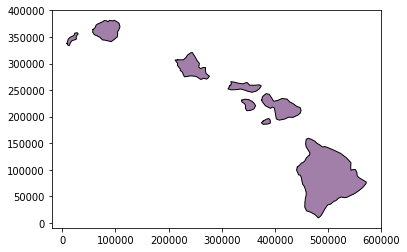

In [15]:
## M3:E1:Cell07
# Add Your Code to calculate area 
# -------------------------------
Hawaii =  States[States.STUSPS == "HI"]
Hawaii =  Hawaii.to_crs({'init': 'epsg:2782'})

Hawaii.plot()

projected_area = (Hawaii['geometry'].area / (1000000)).iloc[0]
# print(projected_area)
print("Area of Hawaii is {0:.0f} square kilometers".format(projected_area))

## Calculate the distance from Honolulu to the center of each of the hiking path


In [19]:
Honolulu = Point(21.315603,-157.858093)

Honolulu = Point(-157.858093, 21.315603)
Centroids = HiTrails ['geometry'].centroid
Distance = (Centroids.distance(Honolulu))
Distance

0     0.423611
1     0.230124
2     0.238197
3     0.062381
4     0.102246
5     0.097030
6     0.206947
7     0.113867
8     0.431499
9     0.045473
10    0.059598
11    0.033675
12    0.093897
13    0.091251
14    0.128254
15    0.127506
16    0.437637
17    0.387339
18    0.397489
19    0.363764
20    0.137286
21    0.136733
22    0.079531
23    0.066664
24    0.046983
25    0.054942
26    0.050393
27    0.047843
28    0.037840
29    0.033810
30    0.033737
31    0.115105
32    0.122480
33    0.065383
34    0.064781
35    0.065659
36    0.133338
37    0.135488
38    0.091767
39    0.042746
40    0.299310
41    0.291579
42    0.038086
43    0.038899
44    0.046996
45    0.435157
46    0.074010
47    0.090868
48    0.487903
49    0.473356
50    0.472127
51    0.205604
52    0.243709
53    0.223878
dtype: float64

## Finding trail w/ the farthest away from honolulu?

In [15]:

Furthest = Distance.max()
print(Furthest)

0.487902609015


## The distance in squared kilometers to this trail?

In [ ]:


in_sq_km = (Hawaii['geometry'].area / (1000000)).iloc[0]

print("The Distance of the farthest trail in Sq. Km  is {0:.0f} square kilometers".format(in_sq_km))